[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W2/W2P1_5.ipynb)

In [ ]:
import numpy as np
import scipy  
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
def return_normalized_sample(sample_size = 11):
    sample = np.random.randn(sample_size)
    sample_mean = np.mean(sample)
    normalized = ((sample - sample_mean)/1)  ### sigma = 1
    return np.sum(np.square(normalized)) 

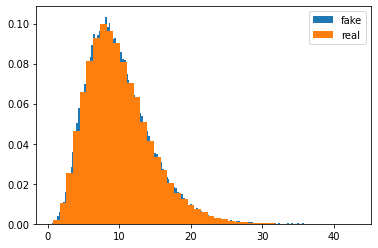

In [ ]:
T = np.array([return_normalized_sample() for i in range(100000)])
plt.hist(T, bins = 150, density = True, label = "fake")
plt.hist(scipy.random.chisquare(10, 50000),bins = 45, density = True, label = "real")
plt.legend()
plt.show()

Let's see what happens if the underlying distribution is not normal?


In [ ]:
var = scipy.stats.t(4).var()

In [ ]:
def f_fake(sample_size = 11):
    sample = np.random.standard_t(df = 4, size= sample_size)  ### degrees of gfreeedom 
    sample_mean = np.mean(sample)
    normalized = ((sample - sample_mean)/(var)**0.5)  ### sigma = var**0.5
    return np.sum(np.square(normalized)) 

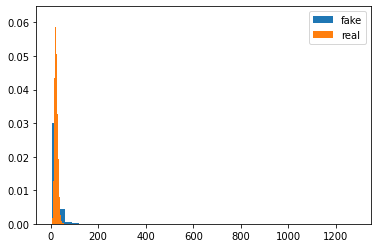

In [ ]:
T = [f_fake(24) for i in range(10000)]
plt.hist(T, bins = 45, density = True, label = "fake")
plt.hist(scipy.random.chisquare(23, 50000),bins = 45, density = True, label = "real")
plt.legend()
plt.show()

$\chi^2 \to N(\mu, \sigma^2)$  as  degree_of_freedoom $\to \infty$  (A consequence of central limit theorem)


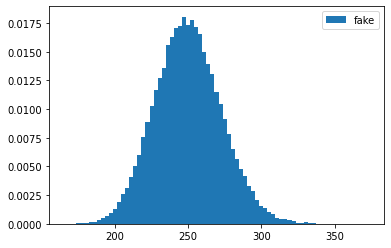

In [ ]:
T = scipy.random.chisquare(250, 50000)  ### degrees of freedom is large here!
plt.hist(T, bins = 75, density = True, label = "fake")
plt.legend()
plt.show()

#Let's talk about kurtosis and skewnees

In [ ]:
def return_kurt(size = 10000, size_of_sample = 10000):
  A = np.random.randn(size, size_of_sample)
  return scipy.stats.kurtosis(A, axis = 1, fisher = False)
T = return_kurt()

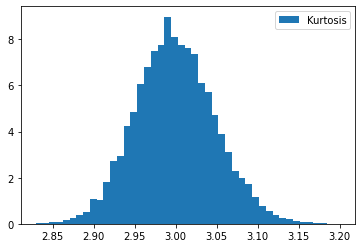

In [ ]:
plt.hist(T, bins = 45, density = True, label = "Kurtosis")
plt.legend()
plt.show()

In [ ]:
def return_skewness(size = 10000, size_of_sample = 10000):
  A = np.random.randn(size, size_of_sample)
  return scipy.stats.skew(A, axis = 1)
T = return_skewness()

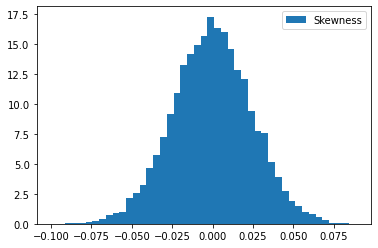

In [ ]:
plt.hist(T, bins = 45, density = True, label = "Skewness")
plt.legend()
plt.show()

In [ ]:
def jar_ber(size = 100000, size_of_sample = 1000):
  A = np.random.randn(size, size_of_sample)
  skewness = scipy.stats.skew(A, axis = 1)
  kurtosis = scipy.stats.kurtosis(A, axis = 1)
  jar_ber =np.square(skewness)/(6/size_of_sample) + np.square(kurtosis - 3)/(24/T)
  return jar_ber

In [ ]:
jar_bers = jar_ber()

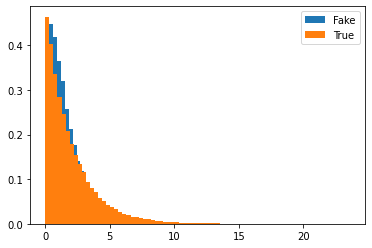

In [ ]:
T = scipy.random.chisquare(2, 100000)  ### degrees of freedom is large here!
plt.hist(jar_bers, bins = 75, density = True ,label = "Fake")
plt.hist(T, bins = 75, density = True, label = "True")
plt.legend()
plt.show()